# Plotting Discrepancies for Kinetic Temperature

In [1]:
import numpy as np
import scipy.stats as sts
from scipy import constants as cnst
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
fname = r"e:/appstateBulk/workAppstateBulk/postProcessing/20250925pp_prj_unsrt/input/20250813aa_computeDiscrep04_forpap_100_500fps/ptv_results.csv"

In [3]:
arr_resol = np.arange(1E-6,40E-6,1.6E-7)
arr_framerate = np.arange(30.0, 500.0, 8.0)
arr_discrep_average = np.zeros((len(arr_resol), len(arr_framerate)))
number_of_averaging_iterations = 40
levels_f_contour = np.array([0,10,40,80,160,320,1000,3000,4000,6000,40000])
max_lev = np.max(levels_f_contour)

In [4]:
df = pd.read_csv(fname, index_col=0)

In [5]:
df.head()

,3.000000000e+01,3.200000000e+01,3.400000000e+01,3.600000000e+01,3.800000000e+01,4.000000000e+01,4.200000000e+01,4.400000000e+01,4.600000000e+01,4.800000000e+01,...,4.860000000e+02,4.880000000e+02,4.900000000e+02,4.920000000e+02,4.940000000e+02,4.960000000e+02,4.980000000e+02,5.000000000e+02,5.020000000e+02,5.040000000e+02
resolution,,,,,,,,,,,,,,,,,,,,,
0.000001,0.785375,0.749607,0.691402,0.634149,0.742454,0.802907,0.757148,0.822462,0.713034,0.650362,...,9.846569,9.974058,10.163177,10.266488,10.386440,10.590333,10.575818,10.712852,10.722434,10.971870
0.000001,0.671393,0.632276,0.762013,0.678088,0.673267,0.679724,0.714737,0.782012,0.681200,0.620725,...,11.069609,11.263079,11.204099,11.555474,11.474416,11.721334,11.886602,12.145526,12.165390,12.366036
0.000001,0.709964,0.633209,0.701309,0.679835,0.697546,0.844929,0.632331,0.688168,0.738408,0.752626,...,12.533964,12.628189,13.031822,12.954449,13.125303,13.214325,13.506385,13.596236,13.815143,13.999402
0.000001,0.653656,0.743862,0.722141,0.640050,0.848097,0.604529,0.716754,0.774244,0.716293,0.815634,...,14.092424,14.330565,14.499857,14.690625,14.882261,14.981426,15.055171,15.488329,15.475346,15.983351
0.000001,0.800806,0.663887,0.723781,0.694051,0.725622,0.677132,0.694771,0.705315,0.731756,0.635382,...,15.781725,15.752720,16.131331,16.356989,16.566049,16.795365,16.970228,17.219441,17.467533,17.918165


In [6]:
frame_rates = df.columns.astype(float).to_numpy()
resolutions = df.index.to_numpy()
Z = df.to_numpy()

<a list of 9 text.Text objects>

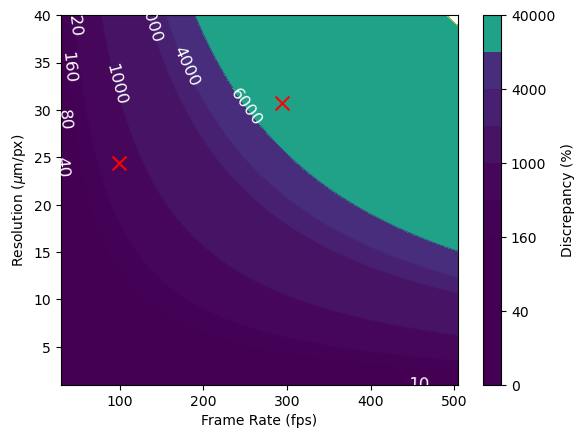

In [7]:
Xf, Yf = np.meshgrid(frame_rates, resolutions * 1000000)


# In[40]:


# Assuming X, Y, arr_discrep_average are already defined
fig5, ax5 = plt.subplots()

# Filled contours
khuj5 = ax5.contourf(Xf, Yf, Z, levels= levels_f_contour, norm=colors.Normalize(vmin=0, vmax=max_lev))

# Add colorbar with customized ticks
cbar5 = plt.colorbar(khuj5, ax=ax5, label='Discrepancy (%)')

# Axis labels
ax5.set_ylabel(r"Resolution ($\mu$m/px)")
ax5.set_xlabel(r"Frame Rate (fps)")

# Experimental points
ax5.scatter([99, 294], [24.39, 30.69], marker='x', color='red', label='Experimental points', s=100)

# Set colorbar limits to enforce end at 400
#cbar.ax.set_ylim(0, 400)

line_contours5 = ax5.contour(Xf, Yf, Z, levels=khuj5.levels, linewidths=0.5,norm=colors.Normalize(vmin=0, vmax=max_lev))

ax5.clabel(
    line_contours5,
    # khuj,
    fmt='%1.0f',
    fontsize=12,
    colors='white',
    inline=True,
    inline_spacing=2,
)